# Import necessary libraries

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import pydot
import json
import os
import pygraphviz

%matplotlib inline

In [22]:
import warnings
warnings.filterwarnings('ignore')

# Open files

In [2]:
files = os.listdir('parsed_data/')
files.remove('.DS_Store')

In [3]:
files

['Colfer Eoin. Artemis Fowl.json',
 'Colfer Eoin. Artemis Fowl. The Opal Deception.json',
 'Colfer Eoin. Artemis Fowl. The Lost Colony.json',
 'Colfer Eoin. Artemis Fowl: The Eternity Code.json',
 'Colfer Eoin. Artemis Fowl and the Atlantis Complex.json',
 'Colfer Eoin. Artemis Fowl: The Time Paradox.json',
 'Colfer Eoin. Artemis Fowl. The Arctic Incident.json']

In [7]:
# Presents how books are ordered in the series
books_order = {1: 'Artemis Fowl', 2: 'Artemis Fowl and the Arctic Incident',
               3: 'Artemis Fowl and the Eternity Code', 4: 'Artemis Fowl and the Opal Deception',
               5: 'Artemis Fowl and the Lost Colony', 6: 'Artemis Fowl and the Time Paradox',
               7: 'Artemis Fowl and the Atlantis Complex'}

# Convert book data into a _networkx_ tree

In [4]:
def get_tree(data):
    G = nx.Graph()
    G.add_node('Text')
    
    sentiment = []
    edgelist = []
    root_to_chapter = []
    for chapter in json_data['text']['chapters']:
        chapt_title = chapter['chapter_title']
        G.add_node(chapt_title)
        G.add_edge(chapt_title, 'Text')
        root_to_chapter.append(('Text', chapt_title))
        par_num = 1
        sentiment.append(chapter['chapter_sentiment'])
        for paragraph in chapter['paragraphs']:
            chapt_par = str(chapter['chapter_number']) +  ' paragraph ' + str(par_num)
            G.add_node(chapt_par)
            G.add_edge(chapt_par, chapt_title)
            sent_num = 1
            for sentence in paragraph['sentences']:
                chapt_par_sent = str(chapter['chapter_number']) +  ' paragraph ' + str(par_num) + str(sent_num)
                G.add_node(chapt_par_sent)
                G.add_edge(chapt_par_sent, chapt_par)
                edgelist.append((chapt_par, chapt_par_sent))
                sent_num += 1
            par_num += 1
    return G, sentiment, root_to_chapter, edgelist

# An example of a simple spiral plot

Generate a networkx graph.  The process is quite straightforward.  Firstly,  agraph is initialized, and a root node 0 is created.  Then, step by step, the next nodes are adding along with connecting new nodes with their parents through edges.

In [9]:
G = nx.Graph()
G.add_node(0)

count = 5
for i in range(1, 6):
    G.add_node(i)
    G.add_edge(i, 0)
    for j in range(3):
        count += 1
        G.add_node(j)
        G.add_edge(count, i)

 Generate a plot. A Graphviz spiral layout is responsponsible for displayinga spiral plot.

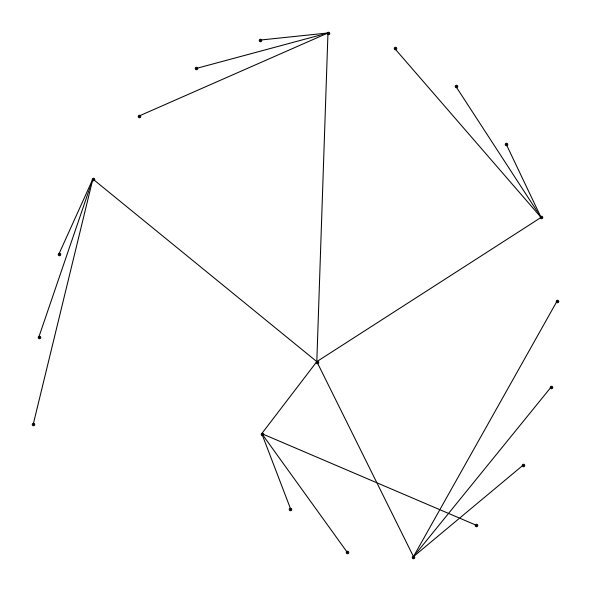

In [20]:
plt.figure(figsize=(8, 8))

pos = nx.spiral_layout(G, resolution=1, equidistant=True)
nx.draw(G, pos,
        with_labels=False,
        alpha=1,
        node_size=6,
        node_color='black')
plt.axis('off')
plt.savefig('../figg.png')
plt.close(fig)

# Generate plots

An example of a plot before parameters were not tuned

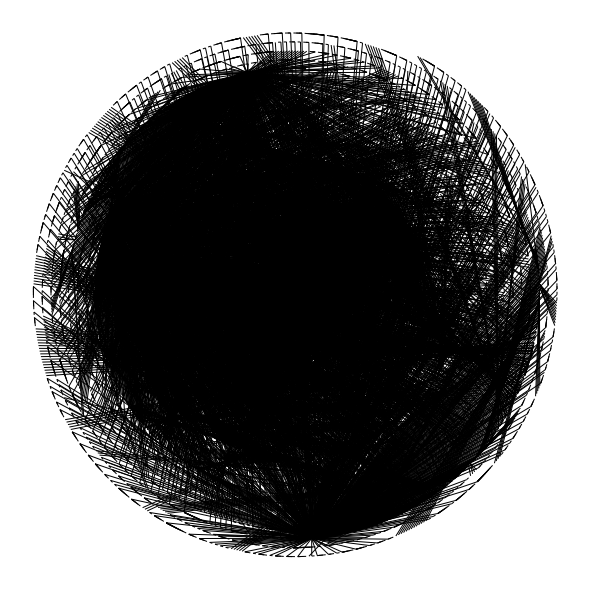

In [36]:
with open('parsed_data/' + files[0]) as f:
    json_data = json.loads(f.read())

    G, sentiment, root_to_chapter, edgelist = get_tree(json_data)
    plt.figure(figsize=(8, 8))
    # use graphviz to find spiral layout
    pos=nx.spiral_layout(G, equidistant=True)
    nx.draw(G, pos,
            with_labels=False,
            alpha=1,
            node_size=0,
            node_color='black')
    plt.axis('off')
    plt.show()

An example of a plot after parameters are tuned

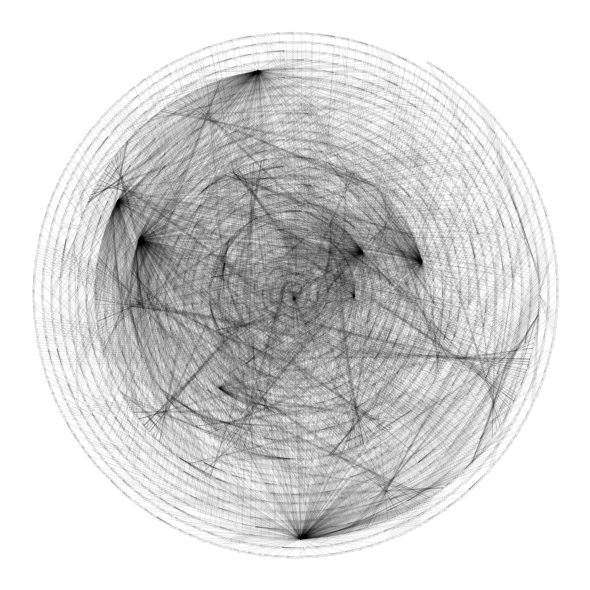

In [27]:
plt.figure(figsize=(8, 8))
    
# get nodes positions
pos=nx.spiral_layout(G, resolution=0.5, equidistant=True)
nx.draw(G, pos,
        with_labels=False,
        alpha=0.06,
        node_size=6,
        node_color='black')

plt.axis('off')
plt.show()

A function to generate a spiral plot with tuned parameters

In [41]:
def generate_spiral_plot(G, resolution, alpha, node_size, equidistant=True, node_color='black'):
    plt.figure(figsize=(8, 8))
    
    # get nodes positions
    pos=nx.spiral_layout(G, resolution=resolution, equidistant=equidistant)
    
    nx.draw(G, pos,
            with_labels=False,
            alpha=alpha,
            node_size=node_size,
            node_color=node_color)
    plt.axis('off')
    plt.savefig(path + str(book_number) + ' ' + book_name + '.png')

# Save plots

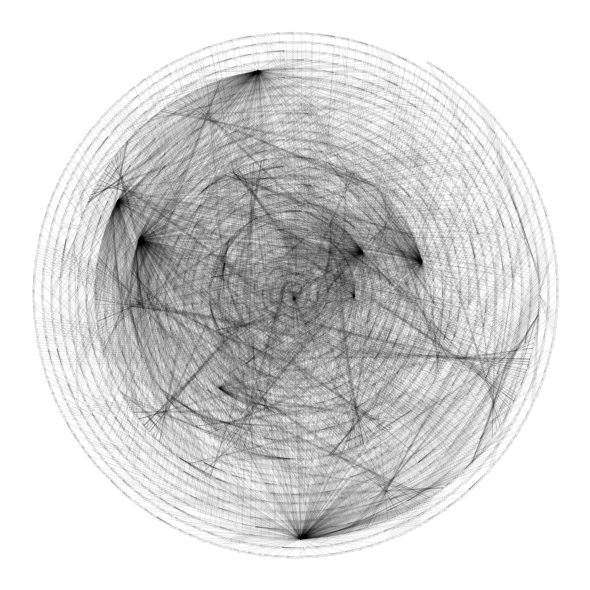

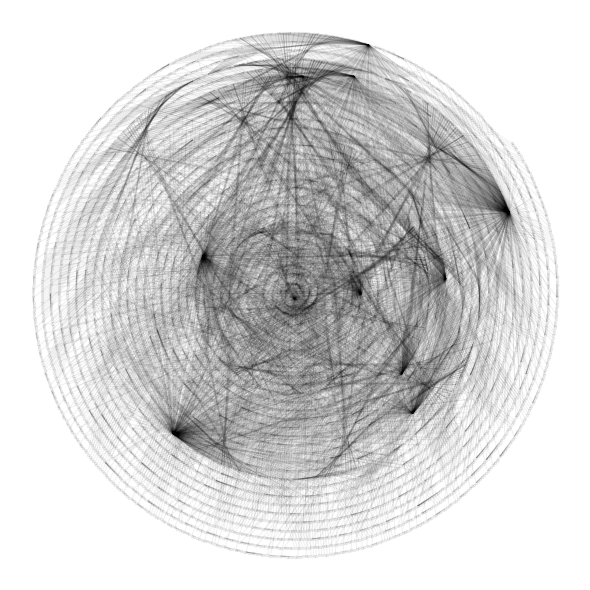

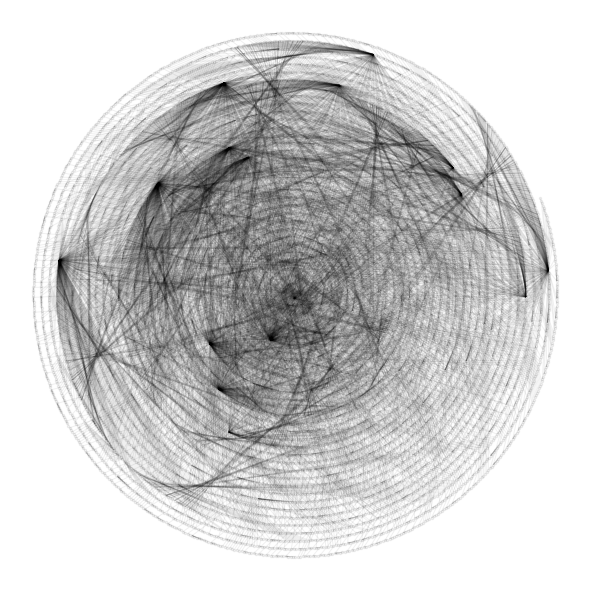

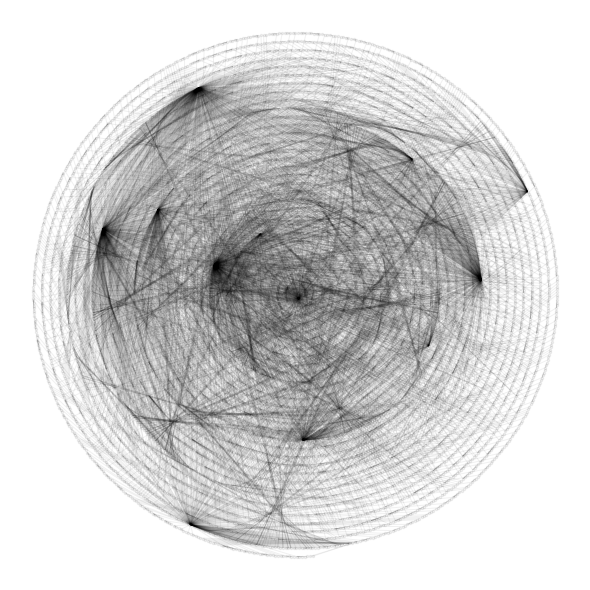

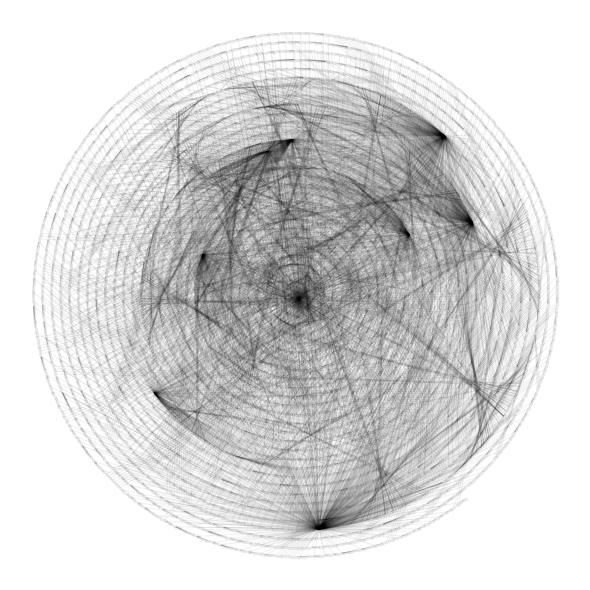

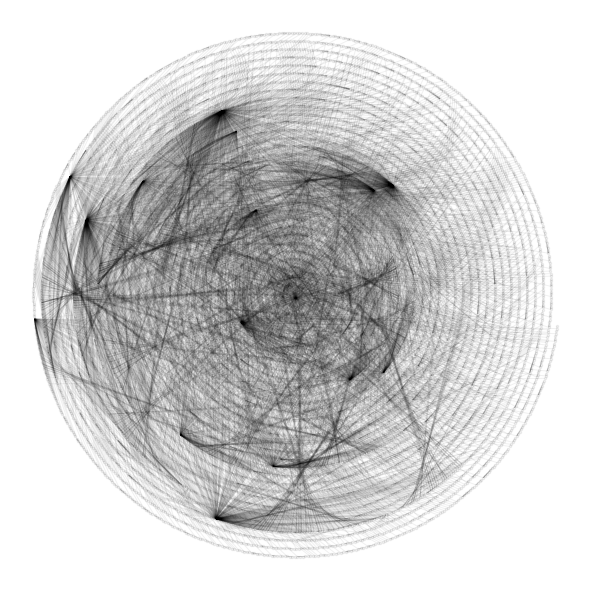

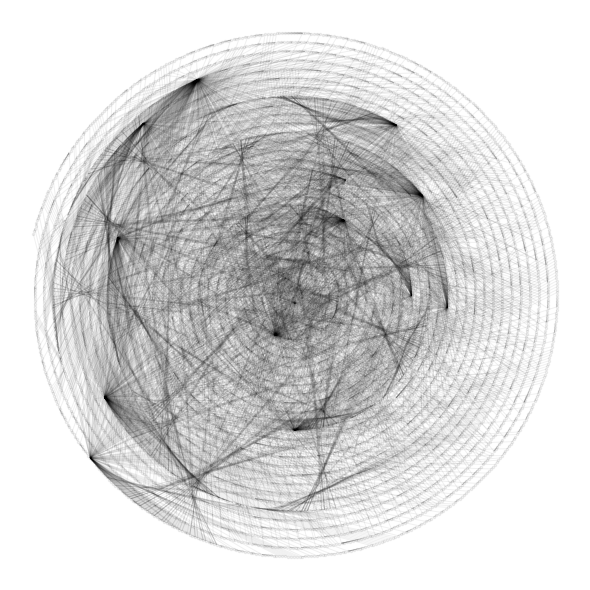

In [42]:
for file in files:
    with open('parsed_data/' + file) as f:
        json_data = json.loads(f.read())
    book_name = json_data['title'].replace('Colfer Eoin. ', '').replace('.', ' and').replace(':', ' and').replace('The', 'the')
    book_number = [key for key,value in books_order.items() if value == book_name][0]

    path = 'spiral_graph/'
    if not os.path.exists(path):
        os.mkdir(path)

    G, sentiment, root_to_chapter, edgelist = get_tree(json_data)
    generate_spiral_plot(G, resolution=0.5, alpha=0.06, node_size=6, equidistant=True, node_color='black')